In [3]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from rasterstats import zonal_stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

### 1. Data preparation

#### 1.1. Shape file

In [ ]:
# Cargar shapefile - Opción 1 (Windows)
shapefile_path = '../data/shape_file_distritos/DISTRITOS.shp'
gdf = gpd.read_file(shapefile_path)
gdf.head()

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297..."
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1,INEI,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,1,INEI,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,SAN ALEJANDRO,0001,1,INEI,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,MONTE ALEGRE,0001,1,INEI,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."


In [ ]:
# Cargar shapefile - Opción 2 (Windows/macOS/Linux)
shapefile_path = os.path.join("..", "data", "shape_file_distritos", "DISTRITOS.shp")
gdf = gpd.read_file(shapefile_path)
gdf.head()

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297..."
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1,INEI,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,1,INEI,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,SAN ALEJANDRO,0001,1,INEI,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,MONTE ALEGRE,0001,1,INEI,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."


#### 1.2. Raster file

In [14]:
# Ruta al archivo raster
raster_file = '../data/tmin_raster.tif'

# Abrir el archivo
with rasterio.open(raster_file) as src:
    print("Ancho:", src.width)
    print("Alto:", src.height)
    print("Número de bandas:", src.count)
    print("Sistema de coordenadas:", src.crs)
    print("Transformación (afín):", src.transform)

    # Bandas
    banda1 = src.read(1)
    banda2 = src.read(2)
    banda3 = src.read(3)
    banda4 = src.read(4)
    banda5 = src.read(5)

Ancho: 285
Alto: 397
Número de bandas: 5
Sistema de coordenadas: EPSG:4326
Transformación (afín): | 0.05, 0.00,-81.38|
| 0.00,-0.05, 1.20|
| 0.00, 0.00, 1.00|


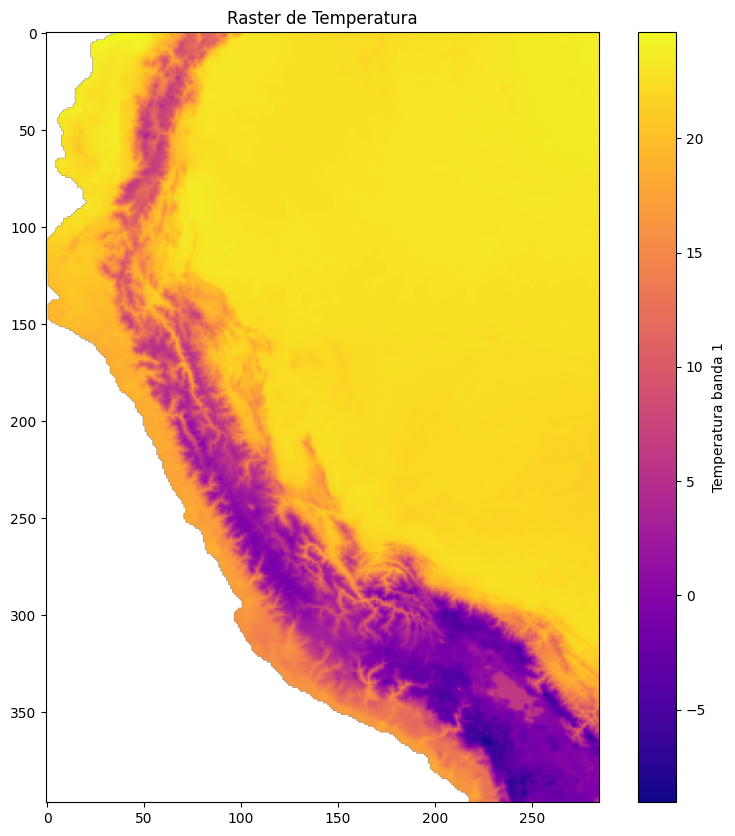

In [15]:
# Visualizamos la banda 1

plt.figure(figsize=(10, 10))
plt.imshow(banda1, cmap='plasma')
plt.colorbar(label='Temperatura banda 1')
plt.title("Raster de Temperatura")
plt.show()

#### 1.3. Cropping

In [ ]:
# Reproyectar shapefile
with rasterio.open(raster_file) as src:       # Abrir el tfile de clasificación
    if gdf.crs != src.crs:                    # Si el sistema de coordenadas es distinto...
        gdf = gdf.to_crs(src.crs)             # ... que adopte el sistema de coordenadas del rasterfile              

    # Recortar el raster usando el shapefile
    out_image, out_transform = mask(src, gdf.geometry, crop=True)   # Recorte en base a geometry de gdf
    out_meta = src.meta.copy()                                      # Copia de la metadata original

# Actualizar metadata para el nuevo raster recortado
out_meta.update({                    # Actualizo la copia de la metadata original con los parámetros del raster recortado
    "height": out_image.shape[1],    # altura
    "width": out_image.shape[2],     # ancho
    "transform": out_transform
})

# Guardar el nuevo raster recortado
with rasterio.open("recorte.tif", "w", **out_meta) as dest:
    dest.write(out_image)

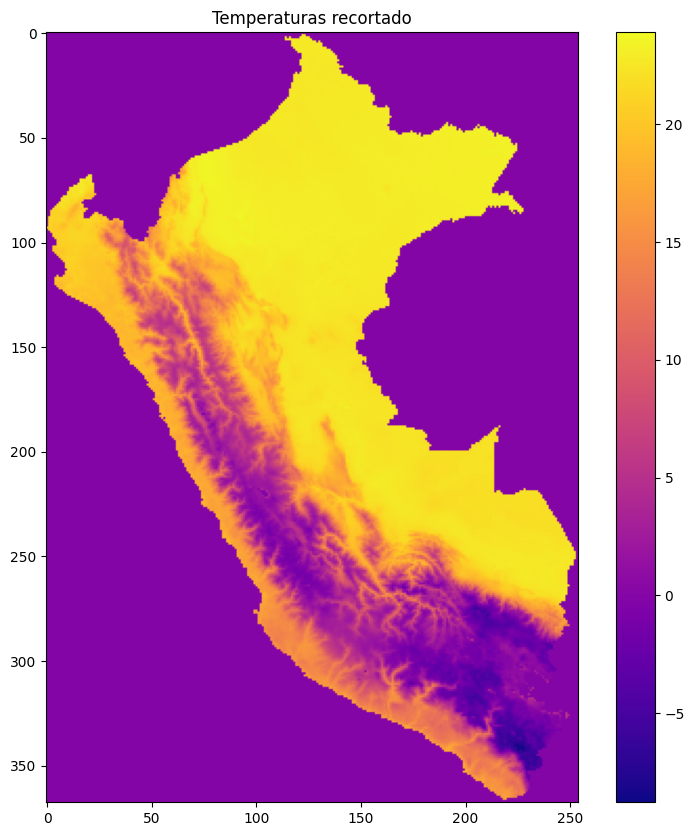

In [ ]:
# Visualizamos el recorte

plt.figure(figsize=(10, 10))
plt.imshow(out_image[0], cmap='plasma')
plt.title("Temperaturas recortado")
plt.colorbar()
plt.show()

### 2. Zonal statistics

### 3. Analysis & visualizations